In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("../dataset/aptops_cleaned.csv")

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,price_per_inch
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3,100.728571
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8,67.589474
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5,36.858974
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7,164.769481
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1,135.609023


In [43]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,price_per_inch
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,Intel HD Graphics 520,Windows 10,1.80,638.0,128,0,0,0,Intel Core i7 6500U,2.5,45.571429
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Intel HD Graphics 520,Windows 10,1.30,1499.0,512,0,0,0,Intel Core i7 6500U,2.5,112.706767
1300,Lenovo,Notebook,14.0,1366x768,2,Intel HD Graphics,Windows 10,1.50,229.0,0,0,0,64,Intel Celeron Dual Core N3050,1.6,16.357143
1301,HP,Notebook,15.6,1366x768,6,AMD Radeon R5 M330,Windows 10,2.19,764.0,0,1024,0,0,Intel Core i7 6500U,2.5,48.974359
1302,Asus,Notebook,15.6,1366x768,4,Intel HD Graphics,Windows 10,2.20,369.0,0,500,0,0,Intel Celeron Dual Core N3050,1.6,23.653846


In [44]:
import re

def extract_resolution(resolution):
    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None





#save the cleaned dataframe
df.to_csv("../dataset/laptops_cleaned.csv", index=False)

df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Hybrid,Flash_Storage,Cpu_brand,Cpu_speed,price_per_inch
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,0,Intel Core i5,2.3,100.728571
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,Intel Core i5,1.8,67.589474
2,HP,Notebook,15.6,Full HD 1920x1080,8,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,0,Intel Core i5 7200U,2.5,36.858974
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,0,Intel Core i7,2.7,164.769481
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,0,Intel Core i5,3.1,135.609023


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define categorical & numerical columns
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu', 'OpSys']

numerical_cols = ['Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Hybrid', 
                  'Flash_Storage', 'Cpu_speed']

# Preprocessor: encode categorical, pass through numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Full pipeline with Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Features and target
X = df.drop(columns=['Price_euros'])  # drop target + raw resolution text
y = df['Price_euros']

# Fit the model
model.fit(X, y)

print("Model training complete ✅")


Model training complete ✅


In [46]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

# Fit again, but on training data only
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
import numpy as np

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Show first 10 results for training set
print("Prediction on Training set:\n", np.round(y_train_pred[:10], 4))
print("\nActual Training data:\n", y_train[:10].values)

# Show first 10 results for test set
print("\nPrediction Test set:\n", np.round(y_pred[:10], 4))
print("\nActual Test data:\n", y_test[:10].values)


Prediction on Training set:
 [ 274.      957.6539 2093.5684  747.1612 1276.6877  524.073  1850.0898
  558.995  2537.45   1180.9046]

Actual Training data:
 [ 274.   1280.   1399.    657.    999.    475.   1649.    489.9  2537.45
 1096.  ]

Prediction Test set:
 [ 648.3495 1087.5849  106.5221 1141.5071  960.1985  545.1214 1117.6576
  865.3759  844.918   822.3063]

Actual Test data:
 [ 784.    579.    274.9  1298.    639.01  615.    713.07  769.15  549.
  498.  ]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.7662
Mean Absolute Error (MAE): 221.91
Root Mean Squared Error (RMSE): 332.65


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


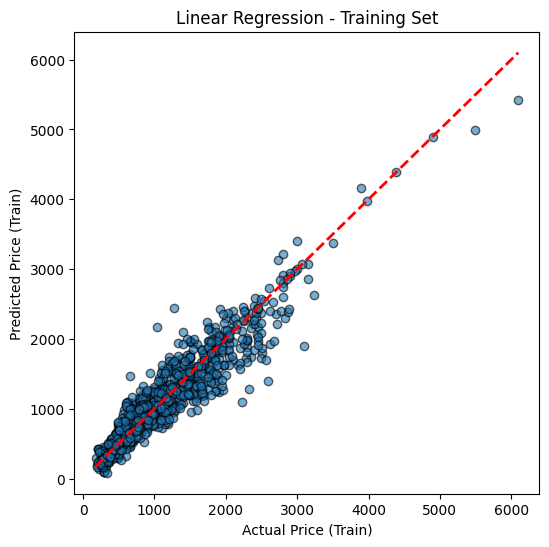

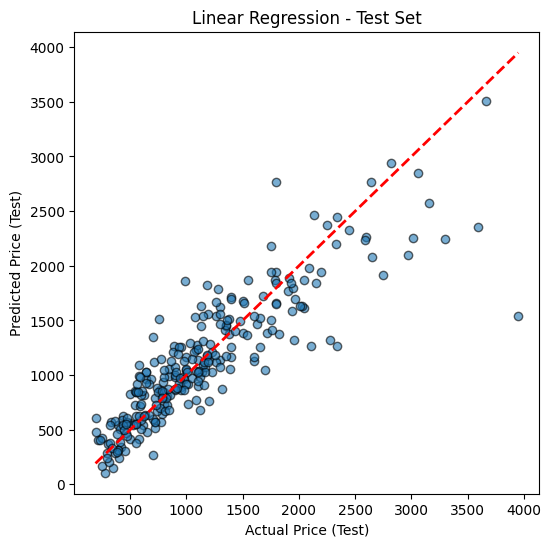

In [49]:
import matplotlib.pyplot as plt

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot for training set
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Price (Train)")
plt.ylabel("Predicted Price (Train)")
plt.title("Linear Regression - Training Set")
plt.show()

# Plot for test set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Price (Test)")
plt.ylabel("Predicted Price (Test)")
plt.title("Linear Regression - Test Set")
plt.show()


In [50]:
import joblib
joblib.dump(model, "../model/laptop_price_model.pkl")


['../model/laptop_price_model.pkl']